In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import imageio
from scipy.signal import convolve2d

In [2]:
im = imageio.imread("../week3/woman.png")

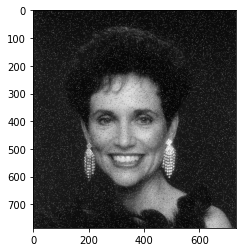

In [3]:
im_salt_pepper = skimage.util.random_noise(im,mode='s&p') * 255
im_salt_pepper = im_salt_pepper.astype('uint8')
plt.imshow(im_salt_pepper,cmap="gray")
plt.show()

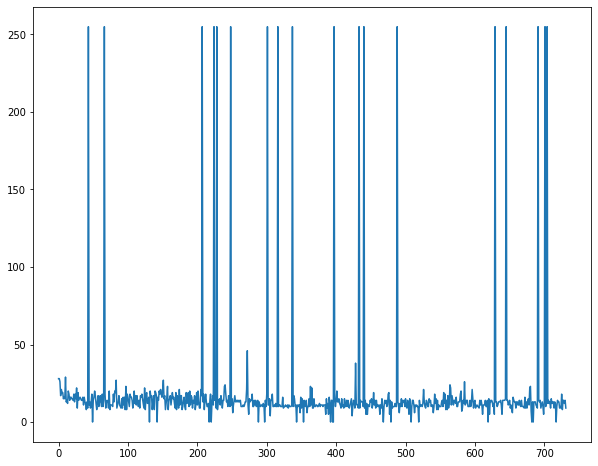

In [4]:
first_row = im_salt_pepper[0]
f = plt.figure(figsize=(10,8))
plt.plot(first_row)

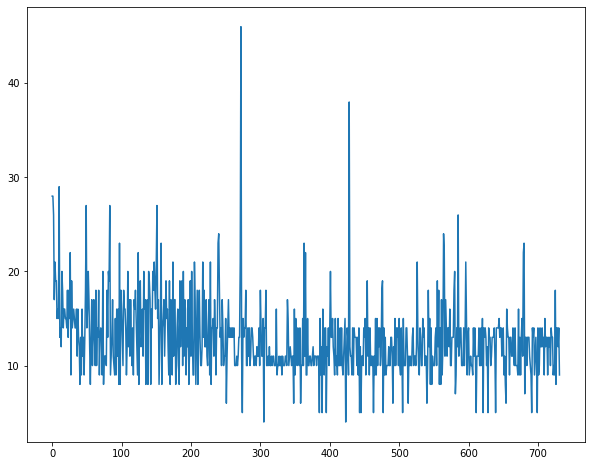

In [5]:
first_row_original = im[0]
f = plt.figure(figsize=(10,8))
plt.plot(first_row_original)

In [6]:
from skimage.filters import median
from skimage.filters.rank import maximum

In [7]:
selem3 = np.ones([3,3])
selem15 = np.ones([15,15])

In [8]:
median_noisy = median(im_salt_pepper, selem=selem3)

In [9]:
median_noisy_15 = median(im_salt_pepper,selem=selem15)

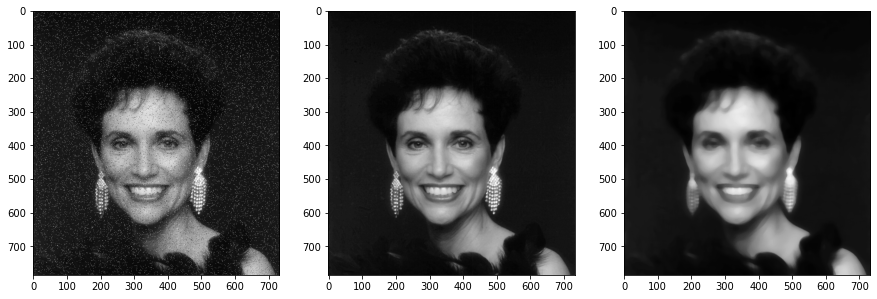

In [10]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.imshow(im_salt_pepper,cmap="gray")
ax2.imshow(median_noisy,cmap="gray")
ax3.imshow(median_noisy_15,cmap="gray")

plt.show()

In [11]:
image_max_3 = maximum(im_salt_pepper, selem=selem3)
image_max_15 = maximum(im_salt_pepper, selem=selem15)

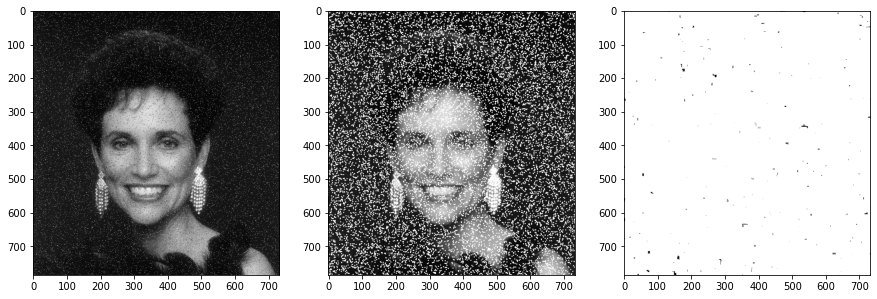

In [12]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.imshow(im_salt_pepper,cmap="gray")
ax2.imshow(image_max_3,cmap="gray")
ax3.imshow(image_max_15,cmap="gray")

plt.show()

In [13]:
Kx = np.array([-1.0,1.0]).reshape((2,1))
Ky = np.array([-1.0,1.0]).reshape((1,2))

In [14]:
Kx.dtype

dtype('float64')

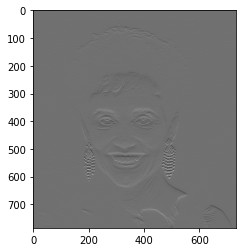

In [15]:
convX = convolve2d(im, Kx, mode='same')
plt.imshow(convX,cmap="gray")
plt.show()

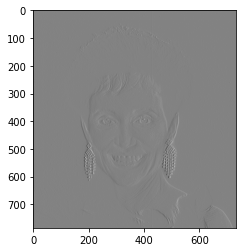

In [37]:
convY = convolve2d(im, Ky, mode='same')
plt.imshow(convY,cmap="gray")
plt.show()

In [17]:
magnitude = np.hypot(convX,convY)

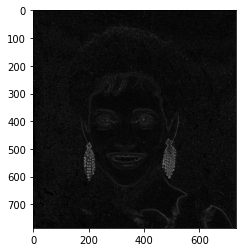

In [18]:
plt.imshow(magnitude,cmap="gray")
plt.show()

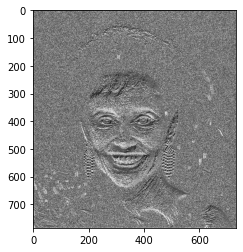

In [19]:
orientation = np.arctan2(convX,convY)
plt.imshow(orientation,cmap="gray")
plt.show()

# HW pen paper


In [20]:
A = np.array([[1,2,3,4],[2,3,1,0],[3,1,2,1]])
B = np.array([[1,0,1,0],[4,5,6,8],[7,8,9,6]])

In [21]:
filt = np.ones([3,3])

In [22]:
medA = median(A, selem=filt)
medB = median(B, selem=filt)

In [23]:
medA

array([[2, 2, 3, 3],
       [2, 2, 2, 1],
       [3, 2, 1, 1]])

In [24]:
medB

array([[1, 1, 1, 1],
       [4, 5, 6, 6],
       [7, 7, 8, 6]])

In [25]:
medA + medB

array([[ 3,  3,  4,  4],
       [ 6,  7,  8,  7],
       [10,  9,  9,  7]])

In [26]:
AB = A+B

In [27]:
medAB = median(A+B, selem=filt)
medAB

array([[2, 4, 4, 4],
       [6, 7, 7, 7],
       [9, 9, 8, 7]])

In [28]:
Apad = np.pad(A,(1,1), mode='constant')

In [29]:
Apad

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4, 0],
       [0, 2, 3, 1, 0, 0],
       [0, 3, 1, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [30]:
medApad = median(Apad, selem=filt)

In [31]:
medApad

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 1, 2, 2, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [32]:
x = np.array([-1,0,1]).reshape([1,3])
y = np.array([1,2,1]).reshape([3,1])

In [33]:
x = np.pad(x, [(1,1),(0,0)], mode='constant')
y = np.pad(y, [(0,0),(1,1)], mode='constant')
y

array([[0, 1, 0],
       [0, 2, 0],
       [0, 1, 0]])

In [34]:
xy = convolve2d(x,y,mode="same")
xy

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [35]:
xyT = convolve2d(x.T,y.T,mode="same")
xyT

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])